### Project 5 - Machine Learning Theory and Linear Regression 2

### Question 1 - Student Grade Performance

Import Student_Marks.csv

1. Use data visualization to get a preliminary understanding of the relationship between grades and the independent variables? What do you find? Do you see any indication of a relationship between the variables? Any indication of a non-linear relationship? Based on your visual inspection, do you think a linear or a polynomial regression will perform best?

2. Explore both linear and polynomial regressions to find the best possible model for predicting credit defaults. I recommend using a 'for loop', search for the best fit model. You should try to find the model that does not over or under fit. 

3. Provide evidence that your model is the best fit. The evidence should include a presentation of the training and test RMSE and graphs. Explain what over fitting and under fitting is and explain how your model avoids both.

4. Compare the performance metric you used here for your best model with the perfomance metric you used on Question 1 from Project 4. How do they compare? Has performance improved or worsened? Explain why you think that this is the case.

5. Save your final model for deployment.

6. Calculate the predicted grade that you will recieve this semester. State the number of other classes that you are taking and your best estimate of the number of hours you spend studying for this class each week on average. Compare your prediction from the last project. 

In [2]:
# Import packages
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import statsmodels.api as sm
from stargazer.stargazer import Stargazer, LineLocation
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from joblib import dump, load
from sklearn.preprocessing import PolynomialFeatures
# Import Data

In [5]:
df = pd.read_csv('C:\\Users\\dukeo\\OneDrive\\Desktop\\ECON 570\\Student_Marks.csv')
df

,number of other courses,time_study,final exam grade
0,2,4.5,63.903
1,3,0.1,52.435
2,3,3.1,58.512
3,5,7.9,97.719
4,7,7.8,100.000
...,...,...,...
95,5,3.6,63.829
96,2,0.3,50.310
97,3,7.2,86.145
98,6,0.3,56.728


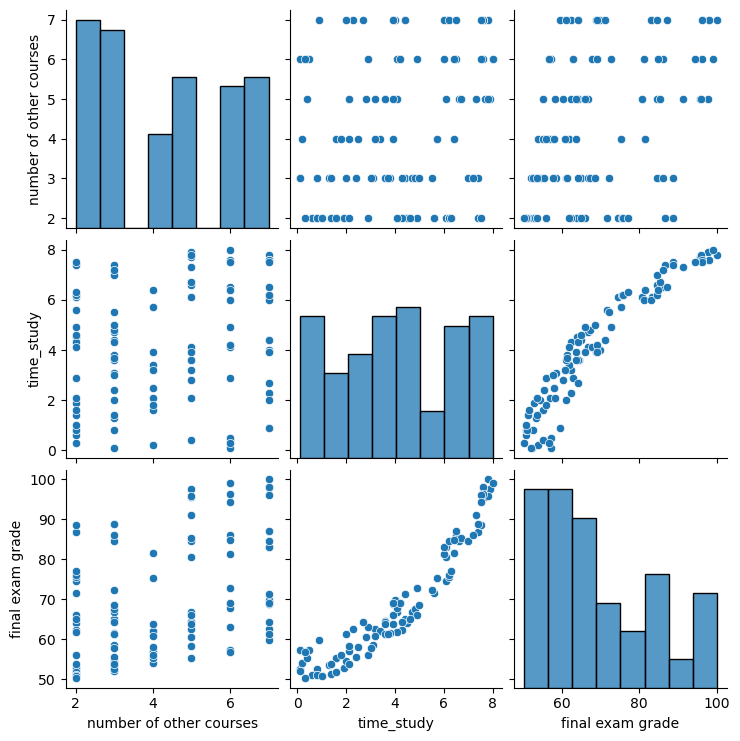

In [6]:
#1.1
sns.pairplot(df)

In [7]:
#1.2
# Define the dependent variable (Y) and the independent variables (X)
X = df.drop(['final exam grade'],axis=1) # independent variables / features
Y = df['final exam grade'] # dependent variables / output
# Loop over polynomial degrees
test_rmse = []
for deg in range(1,4):
    # Create polynomials
    poly_converter = PolynomialFeatures(degree=deg,include_bias=False)
    Xpoly = poly_converter.fit_transform(X)
    # Split
    X_train, X_test, Y_train, Y_test = train_test_split(Xpoly, Y, test_size=0.3, random_state=101)
    # Fit
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,Y_train)
    # Predict
    Yhat_test = model.predict(X_test)
    # Evaluate
    MSEte = mean_squared_error(Y_test,Yhat_test)
    # Store the evaluation
    test_rmse.append(np.sqrt(MSEte))
# Pick lowest
print('RMSEs by PolynomialFeatures: ', test_rmse)

RMSEs by PolynomialFeatures:  [3.3417011817729727, 0.3594075781555518, 0.37261227505000094]


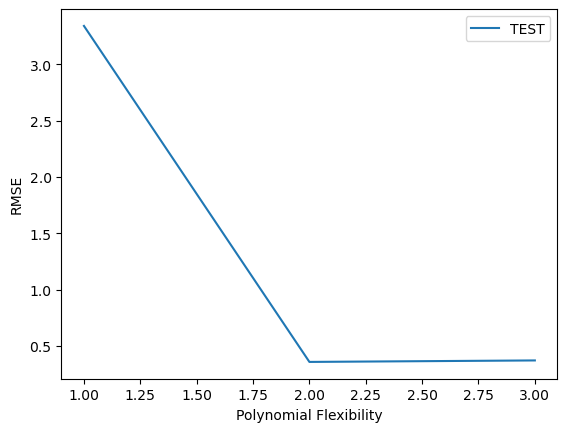

In [8]:
#1.3
# PLOT the results (Error vs polynomial degree level)
plt.plot(range(1,4),test_rmse[:5],label = 'TEST')
plt.xlabel("Polynomial Flexibility")
plt.ylabel("RMSE")
plt.legend ();

In [9]:
#1.4
#From project 4, the best model gave a RMSE of 3.34.
# Here, my best model gives a RMSE of 0.3594075781555518
#Therefore, I find that my best model in project 5 gives a much lower RMSE thus it outperforms the model from project 4. 
#This is because it has the best level of flexibility i.e it balances between variance and bias compared to project 4 model which was under-fitted.

In [9]:
#1.5
# create the independent variables for a 2nd degree polynomial
poly_converter = PolynomialFeatures(degree=2,include_bias=False)
Xpoly = poly_converter.fit_transform(X)
# Fit our final model
model_final = LinearRegression()
model_final.fit(Xpoly,Y)
#save the model
dump (model_final, 'grade_model.joblib')
#1.6
loaded_model = load ('grade_model.joblib')
mystudying = [[0,0]]
mystudying_poly = poly_converter.fit_transform(mystudying)
mystudying

NameError: name 'X' is not defined

### 



























































































Question 2 - Miles Per Gallon Prediction

Import auto-mpg.csv

1. Use data visualization to get a preliminary understanding of the relationship between Miles Per Gallon and the independent variables? What do you find? Do you see any indication of a relationship between the variables? Any indication of a non-linear relationship? Based on your visual inspection, do you think a linear or a polynomial regression will perform best?

2. Explore both linear and polynomial regressions to find the best possible model for predicting credit defaults. I recommend using a 'for loop', search for the best fit model. You should try to find the model that does not over or under fit. 

3. Provide evidence that your model is the best fit. The evidence should include a presentation of the training and test RMSE and graphs. Explain what over fitting and under fitting is and explain how your model avoids both.

4. Compare the performance metric you used here for your final model with the perfomance metric you used on Question 2 from Project 4. How do they compare? Has performance improved or worsened? Explain why you think that this is the case.

5. Save your final model for future deployment. 

6. Input the information for your car (if you have one) or the car of a friend/relative. What is the predicted MPG and how does it compare with the real MPG for the car that you are using for this question? How does the prediction compare to that from Question 2 of Project 4?

In [36]:
df = pd.read_csv('C:\\Users\\dukeo\\OneDrive\\Desktop\\ECON 570\\auto-mpg.csv')
df = df[df['horsepower']!= '?']
df['horsepower'] =pd.to_numeric(df['horsepower'])

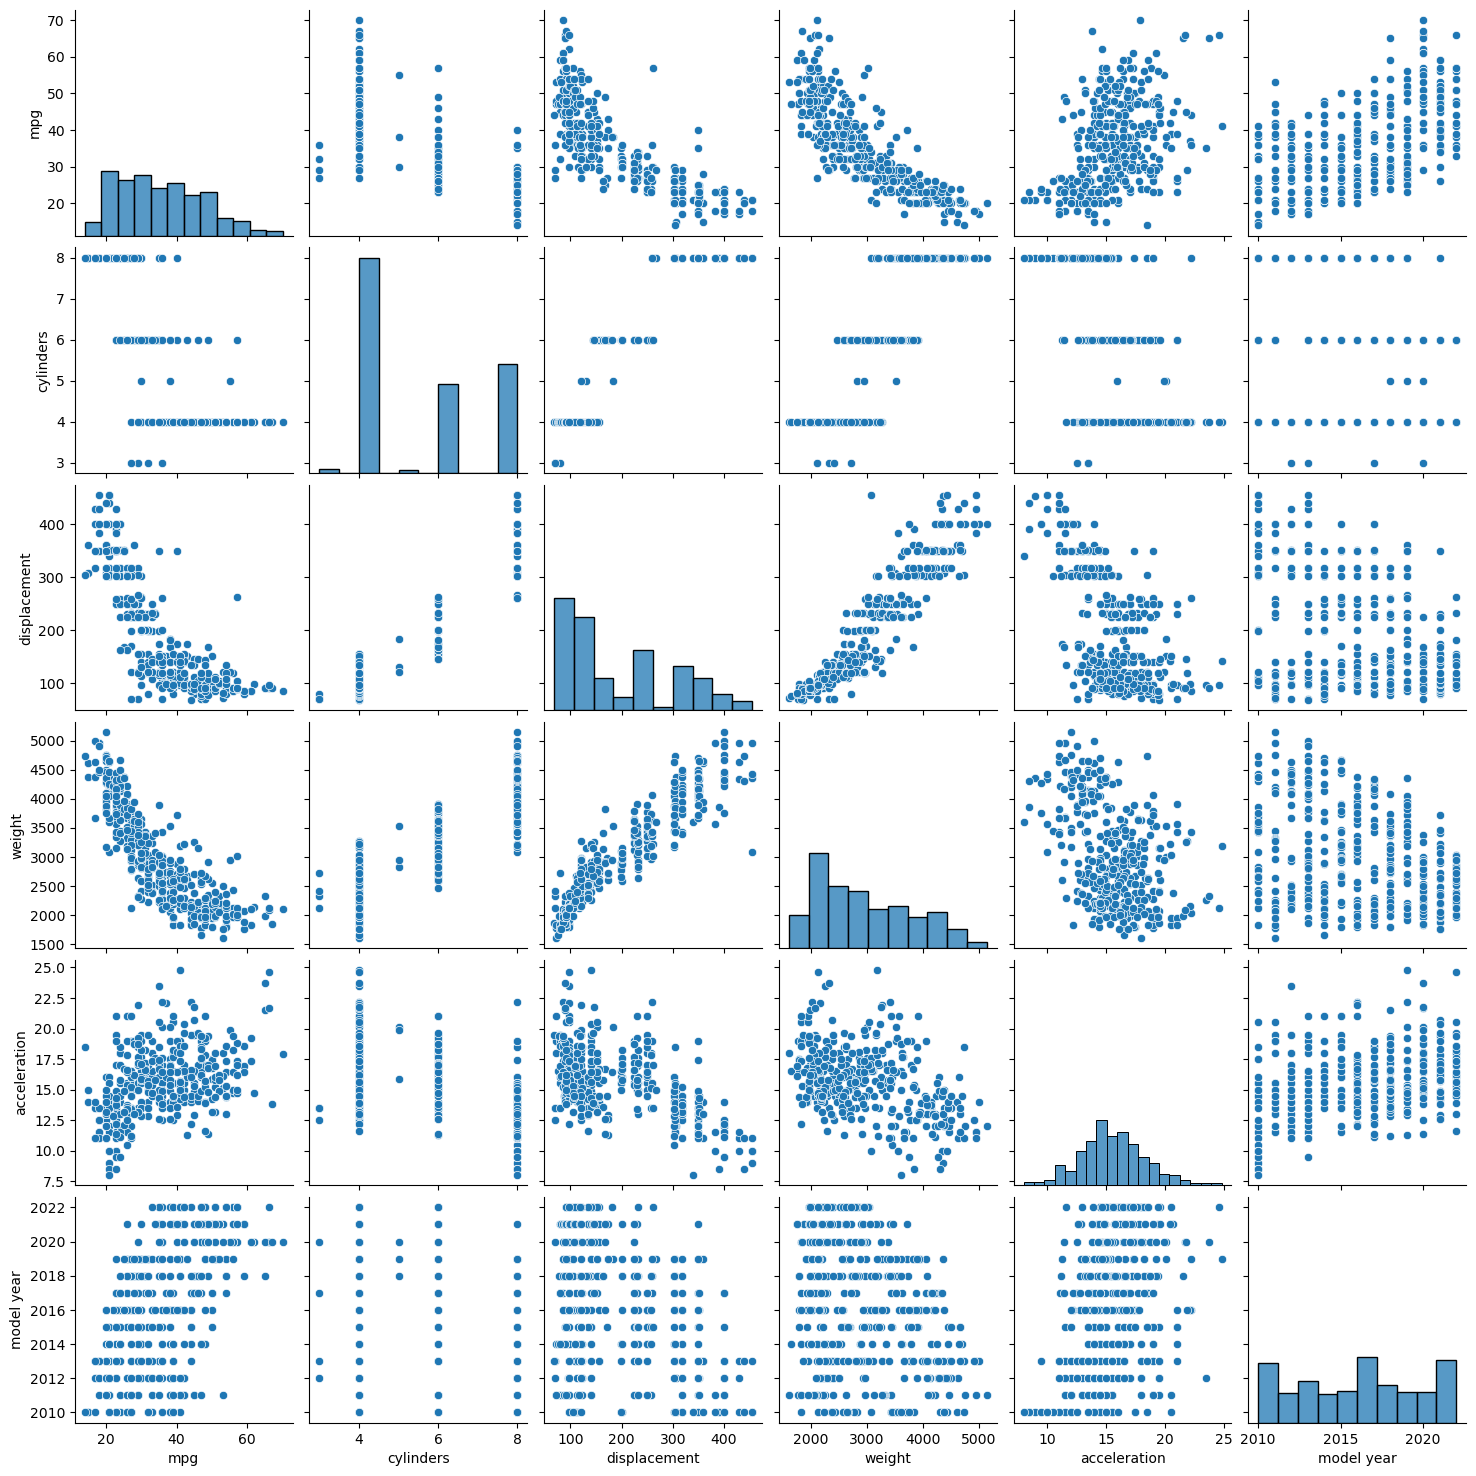

In [32]:
#2.1
sns.pairplot(df)

In [47]:
#2.2
# Define the dependent variable (Y) and the independent variables (X)
X = df.drop(['mpg' ,'origin'],axis=1) # independent variables / features
Y = df['mpg'] # dependent variables / output
# Loop over polynomial degrees
test_rmse = []
for deg in range(1,4):
    # Create polynomials
    poly_converter = PolynomialFeatures(degree=deg,include_bias=False)
    Xpoly = poly_converter.fit_transform(X)
    # Split
    X_train, X_test, Y_train, Y_test = train_test_split(Xpoly, Y, test_size=0.3, random_state=101)
    # Fit
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,Y_train)
    # Predict
    Yhat_test = model.predict(X_test)
    # Evaluate
    MSEte = mean_squared_error(Y_test,Yhat_test)
    # Store the evaluation
    test_rmse.append(np.sqrt(MSEte))
# Pick lowest
print('RMSEs by PolynomialFeatures: ', test_rmse)

RMSEs by PolynomialFeatures:  [5.11483576558872, 4.226529880679375, 6.591117661741605]


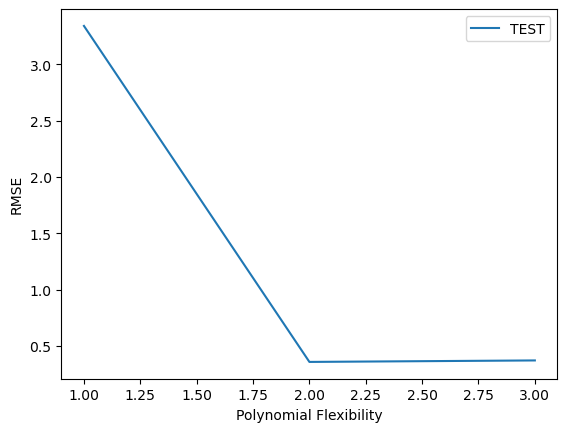

In [85]:
#2.3
# PLOT the results (Error vs polynomial degree level)
plt.plot(range(1,4),test_rmse[:5],label = 'TEST')
plt.xlabel("Polynomial Flexibility")
plt.ylabel("RMSE")
plt.legend ();

### Question 3 - Wine Rating Prediction

import WineQT.csv

The WineQT.csv dataset includes data on wine chemical characteristics for over 1000 wines along with a quality score.

1. Using methods that you have learned so far in the course, create a ML algorithm to generate predicted values of wine quality scores. Explain what methods that you used to generate this model.

2. Provide evidence that your model is the best fit. How did you avoid over and under fitting?

3. Save your model for deployment.

import NewWine.csv

This is a dataset including 20 new wines and their chemical characteristics. They have not been scored for quality yet. 

4. Create a prediced score for each wine. Which wine do you predict will have the highest quality score?

In [99]:
df = pd.read_csv('C:\\Users\\dukeo\\OneDrive\\Desktop\\ECON 570\\WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,6.8,0.59,0.06,6.0,0.060,11.0,18.0,0.99620,3.41,0.59,10.8,6.0,2
1,8.4,0.62,0.09,2.2,0.084,11.0,108.0,0.99640,3.15,0.66,9.8,4.5,3
2,8.2,0.33,0.39,2.5,0.074,29.0,48.0,0.99528,3.32,0.88,12.4,5.8,4
3,11.3,0.34,0.45,2.0,0.082,6.0,15.0,0.99880,2.94,0.66,9.2,5.7,5
4,7.5,0.49,0.19,1.9,0.076,10.0,44.0,0.99570,3.39,0.54,9.7,4.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,7.3,0.51,0.18,2.1,0.070,12.0,28.0,0.99768,3.52,0.73,9.5,5.9,1120
1119,8.2,0.28,0.60,3.0,0.104,10.0,22.0,0.99828,3.39,0.68,10.6,5.1,1121
1120,5.4,0.74,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,5.2,1122
1121,9.0,0.58,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6,4.9,1123
